In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi


## Répliement du spectre 

In [30]:
T = 10
N = 20
dt = T/N
t = np.arange(N)*dt
print("Sample rate", 1/dt)

t_big = np.linspace(0, T, 10000)

Sample rate 2.0


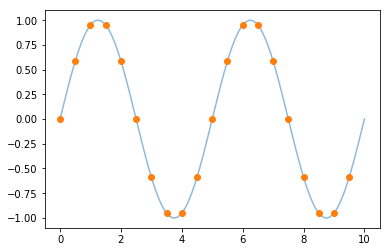

In [31]:
freq = .2
signal = np.sin(2*pi*freq*t)
signal_big = np.sin(2*pi*freq*t_big)
plt.plot(t_big, signal_big, alpha=.5)
plt.plot(t, signal, 'o')

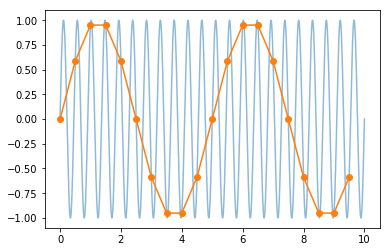

In [33]:
freq = 2.2
signal = np.sin(2*pi*freq*t)
signal_big = np.sin(2*pi*freq*t_big)
plt.plot(t_big, signal_big, alpha=.5)
plt.plot(t, signal, '-o')

## Filtres

In [ ]:
from numpy.fft import fft, ifft

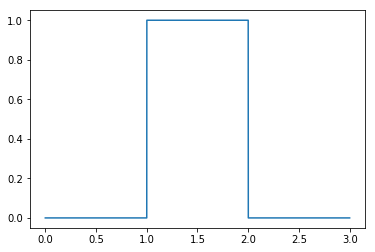

In [6]:
samplerate = 10000
delta_t = 1/samplerate

T = 3
N = T*samplerate


signal = np.zeros(N)
signal[10000:20000] = 1
t = np.arange(len(signal))*delta_t
plt.plot(t, signal)

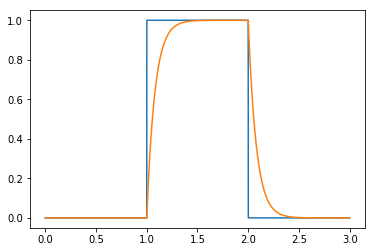

In [7]:
# Filtre passe bas
tau = .5

signal_tilde = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
H = 1/(1+1J*(freqs*tau))
signal_2 = np.fft.irfft(H*signal_tilde)


plt.plot(t, signal)
plt.plot(t, signal_2)

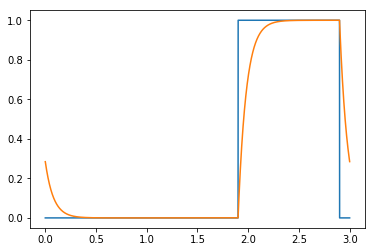

In [8]:
signal = np.zeros(N)
signal[19000:29000] = 1


signal_tilde = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
H = 1/(1+1J*(freqs*tau))
signal_2 = np.fft.irfft(H*signal_tilde)


plt.plot(t, signal)
plt.plot(t, signal_2)

## Filtre sur une image

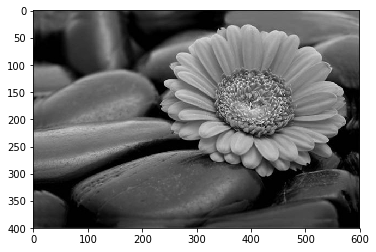

In [40]:
from matplotlib.image import imread

image = imread('marguerite.jpg')
plt.imshow(image, cmap='gray')

In [44]:
from numpy.fft import fft2, ifft2, fftfreq

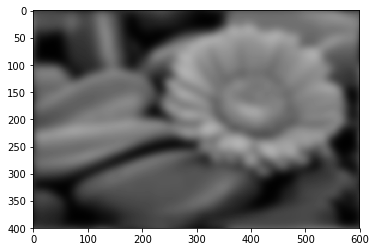

In [59]:
image_tilde = fft2(image)

Delta_x = 50

freq_x = fftfreq(image.shape[0])
freq_y = fftfreq(image.shape[1])
freq_square = freq_x[:, np.newaxis]**2 + freq_y[np.newaxis,:]**2
filtre = np.exp(-freq_square*Delta_x**2/2)

image2_tilde = image_tilde*filtre
image2 = np.real(ifft2(image2_tilde))
plt.imshow(image2, cmap='gray', vmin=0, vmax=256)